In [2]:
#dataset link.
#https://huggingface.co/datasets/kanishka089/weather

In [3]:
#importing necessary library.
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import matplotlib.style as style;
import seaborn as sns;
from sklearn.preprocessing import LabelEncoder;
from sklearn.model_selection import train_test_split;
from sklearn.preprocessing import StandardScaler;
from sklearn.preprocessing import MinMaxScaler;
from sklearn.svm import SVC;
from sklearn.neighbors import KNeighborsClassifier;
from xgboost import XGBClassifier;

In [4]:
#Loading dataset.

In [5]:
weather_df=pd.read_csv("weather.csv");
print("Dataframe of dataset.");
print(weather_df);

Dataframe of dataset.
          id  Temperature  Humidity  Wind Speed  Precipitation    Cloud Cover  \
0          1           14        73         9.5             82  partly cloudy   
1          2           39        96         8.5             71  partly cloudy   
2          3           30        64         7.0             16          clear   
3          4           38        83         1.5             82          clear   
4          5           27        74        17.0             66       overcast   
...      ...          ...       ...         ...            ...            ...   
13195  13196           10        74        14.5             71       overcast   
13196  13197           -1        76         3.5             23         cloudy   
13197  13198           30        77         5.5             28       overcast   
13198  13199            3        76        10.0             94       overcast   
13199  13200           -5        38         0.0             92       overcast   

     

In [6]:
#cleaning and processing data

In [7]:
print("shape of weather dataframe");
print(weather_df.shape);
nof_of_rows_weather_df=weather_df.shape[0];
no_of_column_weather_df=weather_df.shape[1];
print();
print("no of rows=",nof_of_rows_weather_df);
print();
print("no of columns=",no_of_column_weather_df);

shape of weather dataframe
(13200, 12)

no of rows= 13200

no of columns= 12


In [8]:
column_name=weather_df.columns;
print("Column name of dataset.");
print(column_name);
print();
print("Column name of features");
df_features=column_name[0:-1];
print(df_features);
print();
print("Column name of target");
df_target=column_name[-1:];
print(df_target);

Column name of dataset.
Index(['id', 'Temperature', 'Humidity', 'Wind Speed', 'Precipitation',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility', 'Location', 'target'],
      dtype='object')

Column name of features
Index(['id', 'Temperature', 'Humidity', 'Wind Speed', 'Precipitation',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility', 'Location'],
      dtype='object')

Column name of target
Index(['target'], dtype='object')


In [9]:
df_dataype_columns=weather_df.dtypes;
print("Datatype of column.");
print(df_dataype_columns);

Datatype of column.
id                        int64
Temperature               int64
Humidity                  int64
Wind Speed              float64
Precipitation             int64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility              float64
Location                 object
target                   object
dtype: object


In [10]:
print("Numerical column");
numerical_column=weather_df.select_dtypes(include=['int64','float64']).columns;
print(numerical_column);
print();
print("Ctegorical column");
categorical_column=weather_df.select_dtypes(include=['object']).columns;
print(categorical_column);
print();
print("Ctegorical column without target");
final_categorical_column=categorical_column[0:-1];
print(final_categorical_column);

Numerical column
Index(['id', 'Temperature', 'Humidity', 'Wind Speed', 'Precipitation',
       'Atmospheric Pressure', 'UV Index', 'Visibility'],
      dtype='object')

Ctegorical column
Index(['Cloud Cover', 'Season', 'Location', 'target'], dtype='object')

Ctegorical column without target
Index(['Cloud Cover', 'Season', 'Location'], dtype='object')


In [11]:
print("NaN values count");
print(weather_df.isnull().sum());

NaN values count
id                      0
Temperature             0
Humidity                0
Wind Speed              0
Precipitation           0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility              0
Location                0
target                  0
dtype: int64


In [12]:
target_class=weather_df["target"].value_counts();
print(target_class);

target
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


In [13]:
#from above we know that our target have balance class.

In [14]:
#from above we know that no column have NaN values.So we process data clenaing ahead.
#since id column doesn't provid us any insight and independent with other column 
#i wil remove it.

In [15]:
final_numeric_column=numerical_column[1:];
print("Final numerical column");
print(final_numeric_column);

Final numerical column
Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation',
       'Atmospheric Pressure', 'UV Index', 'Visibility'],
      dtype='object')


In [16]:
#we cannot train our model with categorical value so i will use panda library to change
#caregorical value into numerical.

In [17]:
categorical_column_df=weather_df[final_categorical_column];
print("dataframe that have only categorical features.");
print(categorical_column_df);

dataframe that have only categorical features.
         Cloud Cover  Season  Location
0      partly cloudy  Winter    inland
1      partly cloudy  Spring    inland
2              clear  Spring  mountain
3              clear  Spring   coastal
4           overcast  Winter  mountain
...              ...     ...       ...
13195       overcast  Summer  mountain
13196         cloudy  Winter   coastal
13197       overcast  Autumn   coastal
13198       overcast  Winter    inland
13199       overcast  Autumn  mountain

[13200 rows x 3 columns]


In [18]:
dummy_df=pd.get_dummies(categorical_column_df,drop_first=True).replace([True,False],[1,0]);
print("Dummy dataframe");
print(dummy_df);

Dummy dataframe
       Cloud Cover_cloudy  Cloud Cover_overcast  Cloud Cover_partly cloudy  \
0                       0                     0                          1   
1                       0                     0                          1   
2                       0                     0                          0   
3                       0                     0                          0   
4                       0                     1                          0   
...                   ...                   ...                        ...   
13195                   0                     1                          0   
13196                   1                     0                          0   
13197                   0                     1                          0   
13198                   0                     1                          0   
13199                   0                     1                          0   

       Season_Spring  Season_Summer  Season_Win

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3308\3076278425.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummy_df=pd.get_dummies(categorical_column_df,drop_first=True).replace([True,False],[1,0]);


In [19]:
#we have to join two table numerical features dataframe and dummy dataframe

In [20]:
clean_weather_df=pd.concat([weather_df[final_numeric_column],dummy_df],axis=1);
print("final clean dataframe");
print(clean_weather_df);

final clean dataframe
       Temperature  Humidity  Wind Speed  Precipitation  Atmospheric Pressure  \
0               14        73         9.5             82               1010.82   
1               39        96         8.5             71               1011.43   
2               30        64         7.0             16               1018.72   
3               38        83         1.5             82               1026.25   
4               27        74        17.0             66                990.67   
...            ...       ...         ...            ...                   ...   
13195           10        74        14.5             71               1003.15   
13196           -1        76         3.5             23               1067.23   
13197           30        77         5.5             28               1012.69   
13198            3        76        10.0             94                984.27   
13199           -5        38         0.0             92               1015.37   

     

In [21]:
#changing datatype of features.
print("Datatype of features.");
print(clean_weather_df.dtypes);
print();
clean_weather_df=clean_weather_df.astype(int);
print("Datatype of features.");
print(clean_weather_df.dtypes);
print();

Datatype of features.
Temperature                    int64
Humidity                       int64
Wind Speed                   float64
Precipitation                  int64
Atmospheric Pressure         float64
UV Index                       int64
Visibility                   float64
Cloud Cover_cloudy             int64
Cloud Cover_overcast           int64
Cloud Cover_partly cloudy      int64
Season_Spring                  int64
Season_Summer                  int64
Season_Winter                  int64
Location_inland                int64
Location_mountain              int64
dtype: object

Datatype of features.
Temperature                  int64
Humidity                     int64
Wind Speed                   int64
Precipitation                int64
Atmospheric Pressure         int64
UV Index                     int64
Visibility                   int64
Cloud Cover_cloudy           int64
Cloud Cover_overcast         int64
Cloud Cover_partly cloudy    int64
Season_Spring                int64
S

In [22]:
final_weather_dataframe=pd.concat([clean_weather_df,weather_df["target"]],axis=1);
print("Final dataframe after cleaning.");
print(final_weather_dataframe);

Final dataframe after cleaning.
       Temperature  Humidity  Wind Speed  Precipitation  Atmospheric Pressure  \
0               14        73           9             82                  1010   
1               39        96           8             71                  1011   
2               30        64           7             16                  1018   
3               38        83           1             82                  1026   
4               27        74          17             66                   990   
...            ...       ...         ...            ...                   ...   
13195           10        74          14             71                  1003   
13196           -1        76           3             23                  1067   
13197           30        77           5             28                  1012   
13198            3        76          10             94                   984   
13199           -5        38           0             92                  1015

                           Temperature  Humidity  Wind Speed  Precipitation  \
Temperature                   1.000000 -0.207969   -0.070407      -0.287206   
Humidity                     -0.207969  1.000000    0.406443       0.638631   
Wind Speed                   -0.070407  0.406443    1.000000       0.443731   
Precipitation                -0.287206  0.638631    0.443731       1.000000   
Atmospheric Pressure          0.209259 -0.120681   -0.078407      -0.177479   
UV Index                      0.374773 -0.342694   -0.068574      -0.291601   
Visibility                    0.250053 -0.478703   -0.313672      -0.456079   
Cloud Cover_cloudy           -0.063484 -0.172823   -0.061135      -0.001964   
Cloud Cover_overcast         -0.351653  0.363061    0.220274       0.403088   
Cloud Cover_partly cloudy     0.094095 -0.036003   -0.016126      -0.091756   
Season_Spring                 0.185596 -0.099526   -0.048922      -0.112516   
Season_Summer                 0.190761 -0.075871   -

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3308\440740061.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  correlation_matrix = final_weather_dataframe.replace(["Rainy","Snowy","Sunny","Cloudy"],[1,2,3,4]).corr();


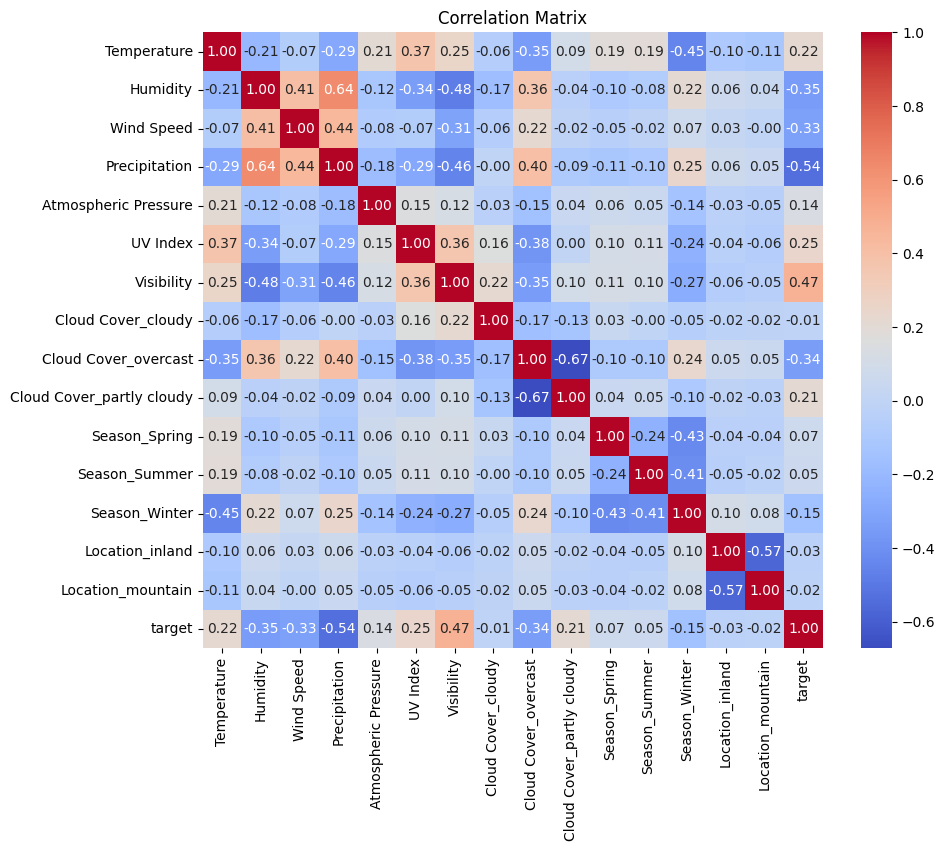

In [23]:
#Showing corelation between features.
correlation_matrix = final_weather_dataframe.replace(["Rainy","Snowy","Sunny","Cloudy"],[1,2,3,4]).corr();
print(correlation_matrix);
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True);
plt.title('Correlation Matrix');
plt.show();

In [24]:
print("NaN values count");
print(final_weather_dataframe.isnull().sum());

NaN values count
Temperature                  0
Humidity                     0
Wind Speed                   0
Precipitation                0
Atmospheric Pressure         0
UV Index                     0
Visibility                   0
Cloud Cover_cloudy           0
Cloud Cover_overcast         0
Cloud Cover_partly cloudy    0
Season_Spring                0
Season_Summer                0
Season_Winter                0
Location_inland              0
Location_mountain            0
target                       0
dtype: int64


In [25]:
print("shape of initial weather dataframe");
print(weather_df.shape);
nof_of_rows_weather_df=weather_df.shape[0];
no_of_column_weather_df=weather_df.shape[1];
print();
print("no of rows=",nof_of_rows_weather_df);
print();
print("no of columns=",no_of_column_weather_df);
print();
print("shape of clean weather dataframe");
print(final_weather_dataframe.shape);
no_of_rows_clean_weather_df=final_weather_dataframe.shape[0];
no_of_column_clean_weather_df=final_weather_dataframe.shape[1];
print();
print("no of rows=",no_of_rows_clean_weather_df);
print();
print("no of columns=",no_of_column_clean_weather_df);

shape of initial weather dataframe
(13200, 12)

no of rows= 13200

no of columns= 12

shape of clean weather dataframe
(13200, 16)

no of rows= 13200

no of columns= 16


In [26]:
#Split the dataset
#we will provide 80% row for training and 20% for testing.

In [27]:
x=final_weather_dataframe.drop(columns=["target"],axis=1);
y=final_weather_dataframe["target"];
print("features column value");
print(x);
print();
print("target column value");
print(y);
print();
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51);
print("xtrain");
print();
print(x_train);
print();
print(x_train.shape);
print();
print("xtest");
print();
print(x_test);
print();
print(x_test.shape);
print();
print("ytrain");
print();
print(y_train);
print();
print(y_train.shape);
print();
print("ytest");
print();
print(y_test);
print();
print(y_test.shape);

features column value
       Temperature  Humidity  Wind Speed  Precipitation  Atmospheric Pressure  \
0               14        73           9             82                  1010   
1               39        96           8             71                  1011   
2               30        64           7             16                  1018   
3               38        83           1             82                  1026   
4               27        74          17             66                   990   
...            ...       ...         ...            ...                   ...   
13195           10        74          14             71                  1003   
13196           -1        76           3             23                  1067   
13197           30        77           5             28                  1012   
13198            3        76          10             94                   984   
13199           -5        38           0             92                  1015   

     

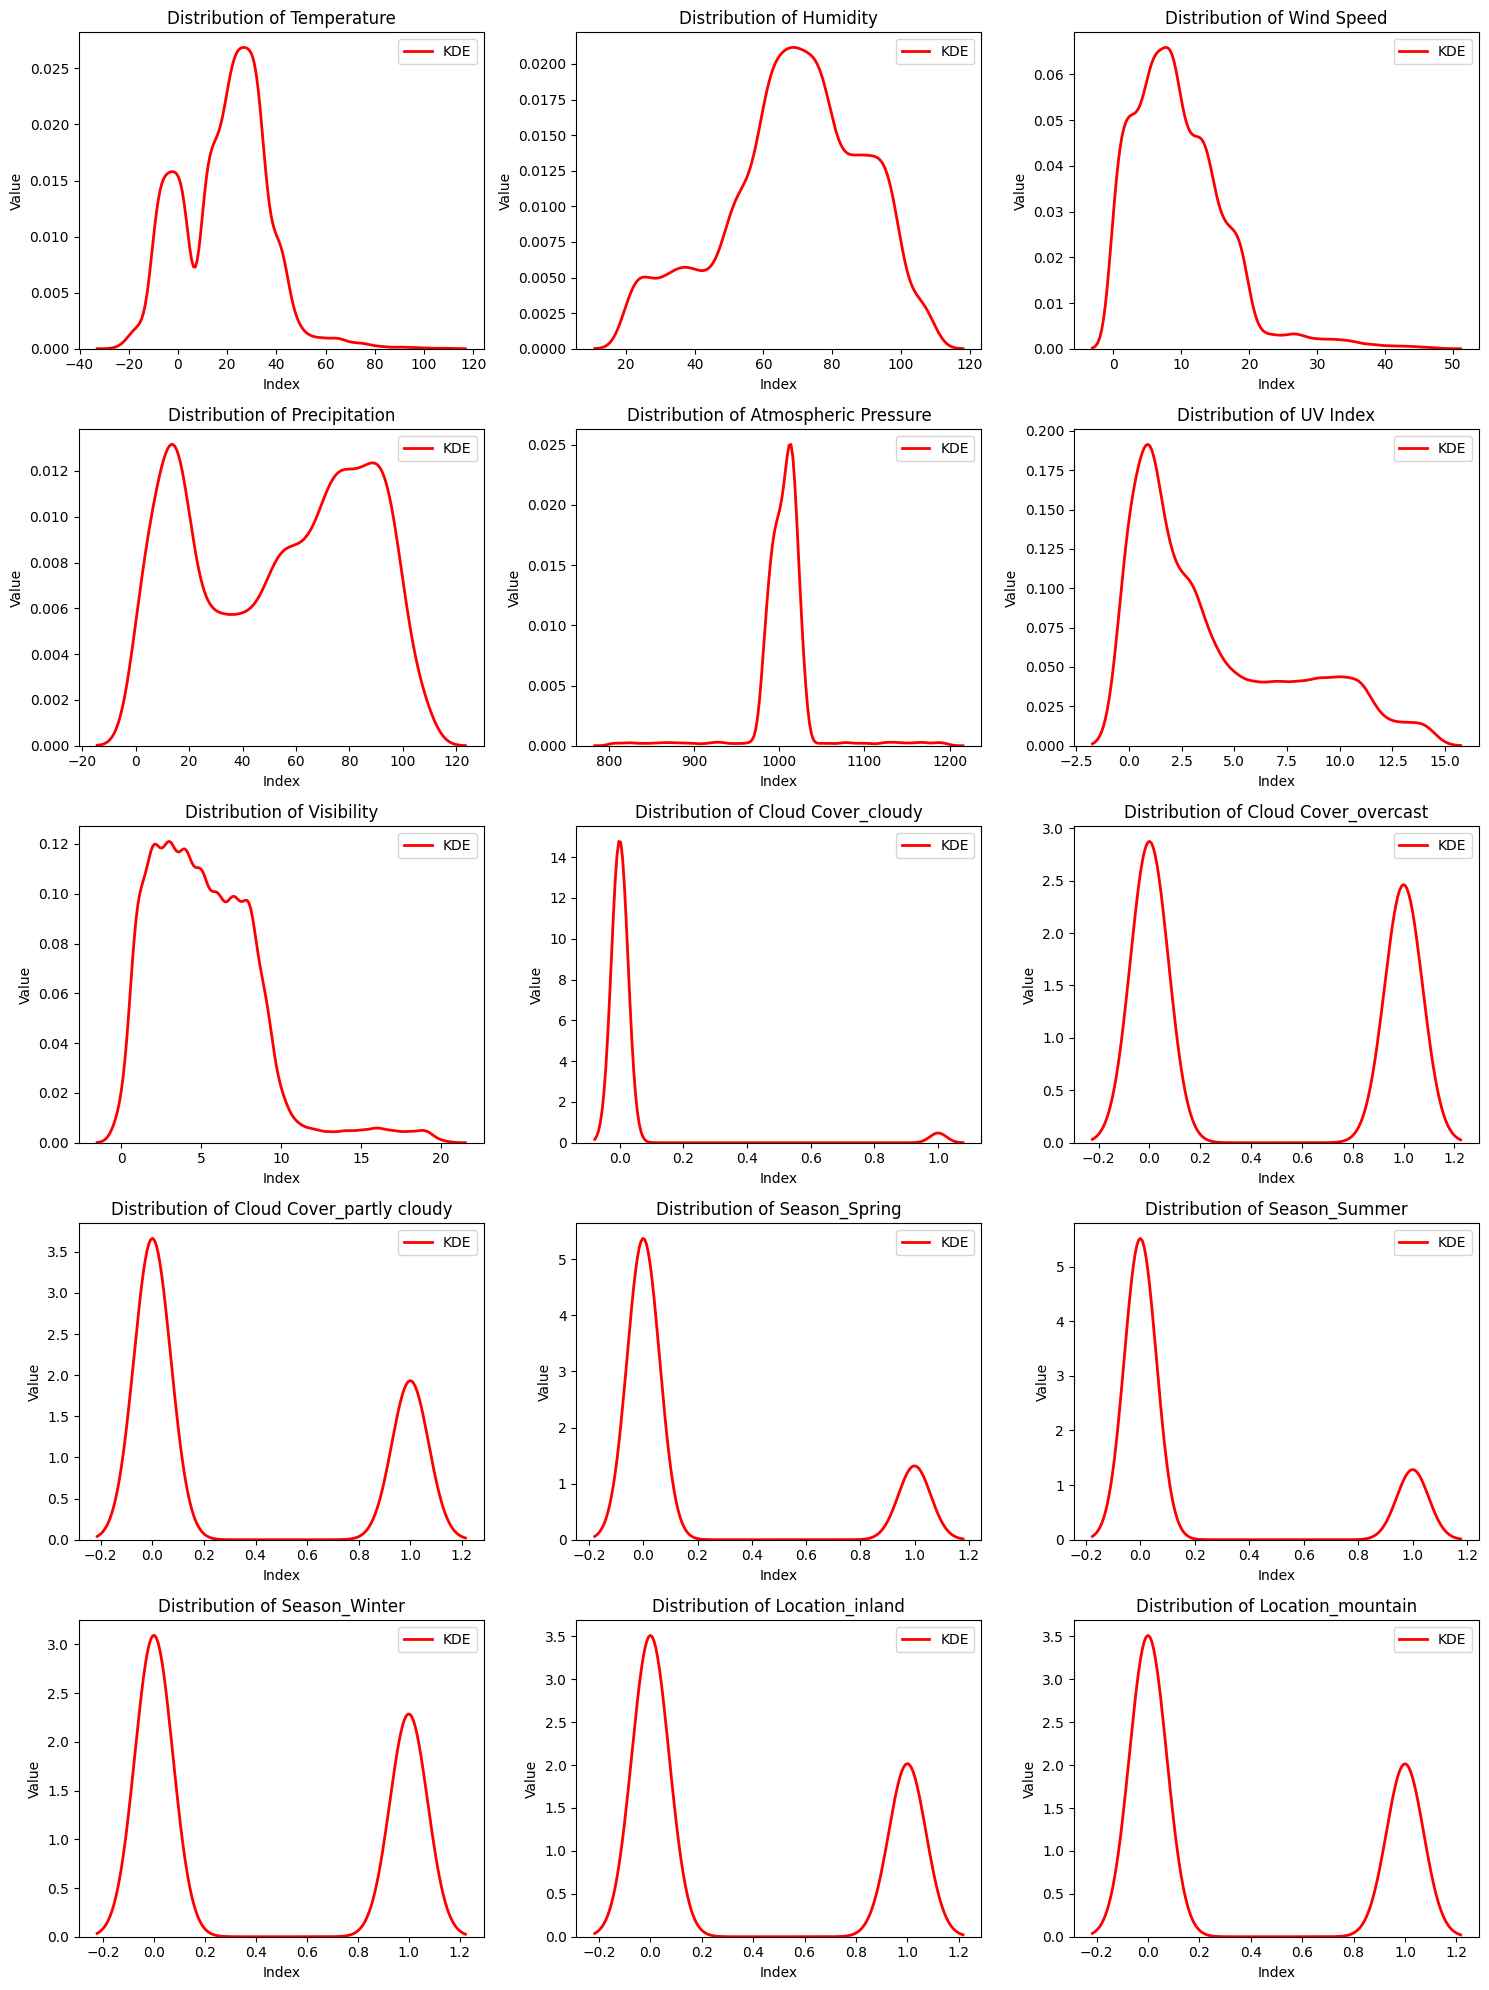

In [28]:
# List of features to check for Gaussian distribution
features_to_check = final_weather_dataframe.drop(columns=["target"], axis=1).columns;

# Create a figure with subplots
n_features = len(features_to_check);
n_cols = 3  # Number of columns per row
n_rows = (n_features // n_cols) + (n_features % n_cols > 0);

# Set up the figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4));
axes = axes.flatten(); # Flatten the axes array for easier indexing

# Plot each feature
for i, feature in enumerate(features_to_check):
    sns.kdeplot(data=final_weather_dataframe[feature], ax=axes[i], color="red", lw=2, label='KDE')
    axes[i].set_title(f'Distribution of {feature}');
    axes[i].set_xlabel('Index');
    axes[i].set_ylabel('Value');
    axes[i].legend();

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j]);

# Adjust layout
plt.tight_layout();
plt.show();

In [29]:
#From above graphical representation maximum features don't follow guassian distribution
#so i will use MinMax scaler for feature scalling.

In [30]:
sc = MinMaxScaler();
sc.fit(x_train);
X_train = sc.transform(x_train);
X_test = sc.transform(x_test);
print("X_train");
print();
print(X_train);
print();
print("X_test");
print();
print(X_test);

X_train

[[0.19548872 0.73033708 0.125      ... 1.         0.         1.        ]
 [0.40601504 0.51685393 0.02083333 ... 0.         1.         0.        ]
 [0.48120301 0.3258427  0.02083333 ... 0.         0.         0.        ]
 ...
 [0.47368421 0.76404494 0.39583333 ... 0.         1.         0.        ]
 [0.28571429 0.33707865 0.125      ... 0.         0.         1.        ]
 [0.19548872 0.5505618  0.39583333 ... 1.         1.         0.        ]]

X_test

[[0.42857143 0.51685393 0.29166667 ... 0.         0.         0.        ]
 [0.39097744 0.35955056 0.02083333 ... 0.         1.         0.        ]
 [0.43609023 0.47191011 0.20833333 ... 0.         1.         0.        ]
 ...
 [0.13533835 0.51685393 0.375      ... 1.         1.         0.        ]
 [0.35338346 0.47191011 0.27083333 ... 0.         0.         1.        ]
 [0.38345865 0.66292135 0.27083333 ... 0.         1.         0.        ]]


In [31]:
#Fitting models

In [32]:
#1.KNN model
classifier = KNeighborsClassifier(n_neighbors=1);
fit_knn=classifier.fit(X_train, y_train);
score_value=classifier.score(X_test,y_test);
predict_value=classifier.predict(X_test);
print("score value");
print(score_value);
print("predict value");
print(predict_value);

score value
0.8878787878787879
predict value
['Rainy' 'Sunny' 'Rainy' ... 'Snowy' 'Rainy' 'Cloudy']


In [33]:
classifier = KNeighborsClassifier(n_neighbors=2);
fit_knn=classifier.fit(X_train, y_train);
score_value=classifier.score(X_test,y_test);
predict_value=classifier.predict(X_test);
print("score value");
print(score_value);
print("predict value");
print(predict_value);

score value
0.884090909090909
predict value
['Rainy' 'Sunny' 'Rainy' ... 'Snowy' 'Rainy' 'Cloudy']


In [34]:
classifier = KNeighborsClassifier(n_neighbors=3);
fit_knn=classifier.fit(X_train, y_train);
score_value=classifier.score(X_test,y_test);
predict_value=classifier.predict(X_test);
print("score value");
print(score_value);
print("predict value");
print(predict_value);

score value
0.8901515151515151
predict value
['Rainy' 'Sunny' 'Rainy' ... 'Snowy' 'Rainy' 'Cloudy']


In [35]:
#2.SVM model

In [36]:
classification_rbf_2 = SVC(kernel='rbf');
classification_rbf_2.fit(X_train, y_train);
score_value=classification_rbf_2.score(X_test, y_test);
predict_value=classification_rbf_2.predict(X_test);
print("score value");
print(score_value);
print("predict value");
print(predict_value);

score value
0.8973484848484848
predict value
['Rainy' 'Sunny' 'Rainy' ... 'Snowy' 'Rainy' 'Cloudy']


In [37]:
classification_poly = SVC(kernel='poly', degree=2)
classification_poly.fit(X_train, y_train);
score_value=classification_poly.score(X_test, y_test);
predict_value=classification_poly.predict(X_test);
print("score value");
print(score_value);
print("predict value");
print(predict_value);

score value
0.8931818181818182
predict value
['Rainy' 'Sunny' 'Rainy' ... 'Snowy' 'Rainy' 'Cloudy']


In [38]:
classification_linear = SVC(kernel='linear');
classification_linear.fit(X_train, y_train);
score_value=classification_linear.score(X_test, y_test);
predict_value=classification_linear.predict(X_test);
print("score value");
print(score_value);
print("predict value");
print(predict_value);

score value
0.8791666666666667
predict value
['Rainy' 'Sunny' 'Rainy' ... 'Snowy' 'Rainy' 'Cloudy']


In [39]:
#3.XGBoost
lbe=LabelEncoder();
lbe_column=lbe.fit_transform(final_weather_dataframe["target"]);
print("lbe column");
print(lbe_column);
print();
print("Traget column class and their occurence number");
print(pd.DataFrame(lbe_column).value_counts());
print();
# Print the mapping of target values to numerical values
print("Mapping of target values to numerical values:")
for index, class_label in enumerate(lbe.classes_):
    print(f"{class_label} -> {index}")
print();
final_weather_dataframe["target"]=lbe_column;
print("final_weather_dataframe");
print(final_weather_dataframe);

lbe column
[1 0 3 ... 0 2 1]

Traget column class and their occurence number
0
0    3300
1    3300
2    3300
3    3300
Name: count, dtype: int64

Mapping of target values to numerical values:
Cloudy -> 0
Rainy -> 1
Snowy -> 2
Sunny -> 3

final_weather_dataframe
       Temperature  Humidity  Wind Speed  Precipitation  Atmospheric Pressure  \
0               14        73           9             82                  1010   
1               39        96           8             71                  1011   
2               30        64           7             16                  1018   
3               38        83           1             82                  1026   
4               27        74          17             66                   990   
...            ...       ...         ...            ...                   ...   
13195           10        74          14             71                  1003   
13196           -1        76           3             23                  1067   
13197    

In [40]:
x=final_weather_dataframe.drop(columns=["target"],axis=1);
y=final_weather_dataframe["target"];
print("features column value");
print(x);
print();
print("target column value");
print(y);
print();
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51);
print("xtrain");
print();
print(x_train);
print();
print(x_train.shape);
print();
print("xtest");
print();
print(x_test);
print();
print(x_test.shape);
print();
print("ytrain");
print();
print(y_train);
print();
print(y_train.shape);
print();
print("ytest");
print();
print(y_test);
print();
print(y_test.shape);

features column value
       Temperature  Humidity  Wind Speed  Precipitation  Atmospheric Pressure  \
0               14        73           9             82                  1010   
1               39        96           8             71                  1011   
2               30        64           7             16                  1018   
3               38        83           1             82                  1026   
4               27        74          17             66                   990   
...            ...       ...         ...            ...                   ...   
13195           10        74          14             71                  1003   
13196           -1        76           3             23                  1067   
13197           30        77           5             28                  1012   
13198            3        76          10             94                   984   
13199           -5        38           0             92                  1015   

     

In [41]:
xgb_model =XGBClassifier()
xgb_model.fit(x_train, y_train)
score_value=xgb_model.score(x_test, y_test);
predict_value=xgb_model.predict(x_test);
print("score value");
print(score_value);
print("predict value");
print(predict_value);

score value
0.9109848484848485
predict value
[1 3 1 ... 2 1 0]


In [42]:
sc = MinMaxScaler();
sc.fit(x_train);
X_train = sc.transform(x_train);
X_test = sc.transform(x_test);
print("X_train");
print();
print(X_train);
print();
print("X_test");
print();
print(X_test);

X_train

[[0.19548872 0.73033708 0.125      ... 1.         0.         1.        ]
 [0.40601504 0.51685393 0.02083333 ... 0.         1.         0.        ]
 [0.48120301 0.3258427  0.02083333 ... 0.         0.         0.        ]
 ...
 [0.47368421 0.76404494 0.39583333 ... 0.         1.         0.        ]
 [0.28571429 0.33707865 0.125      ... 0.         0.         1.        ]
 [0.19548872 0.5505618  0.39583333 ... 1.         1.         0.        ]]

X_test

[[0.42857143 0.51685393 0.29166667 ... 0.         0.         0.        ]
 [0.39097744 0.35955056 0.02083333 ... 0.         1.         0.        ]
 [0.43609023 0.47191011 0.20833333 ... 0.         1.         0.        ]
 ...
 [0.13533835 0.51685393 0.375      ... 1.         1.         0.        ]
 [0.35338346 0.47191011 0.27083333 ... 0.         0.         1.        ]
 [0.38345865 0.66292135 0.27083333 ... 0.         1.         0.        ]]


In [43]:
xgb_model =XGBClassifier()
xgb_model.fit(X_train, y_train)
score_value=xgb_model.score(X_test, y_test);
predict_value=xgb_model.predict(X_test);
print("score value");
print(score_value);
print("predict value");
print(predict_value);
print();
# Mapping of target values to numerical values:
# Cloudy -> 0
# Rainy -> 1
# Snowy -> 2
# Sunny -> 3
print("Predicted value in class form");
predict_value_df=pd.DataFrame(predict_value,columns=["target"]);
print(predict_value_df["target"].replace([0,1,2,3],["Cloudy","Rainy","Snowy","Sunny"]));

score value
0.9109848484848485
predict value
[1 3 1 ... 2 1 0]

Predicted value in class form
0        Rainy
1        Sunny
2        Rainy
3       Cloudy
4        Sunny
         ...  
2635     Sunny
2636     Rainy
2637     Snowy
2638     Rainy
2639    Cloudy
Name: target, Length: 2640, dtype: object


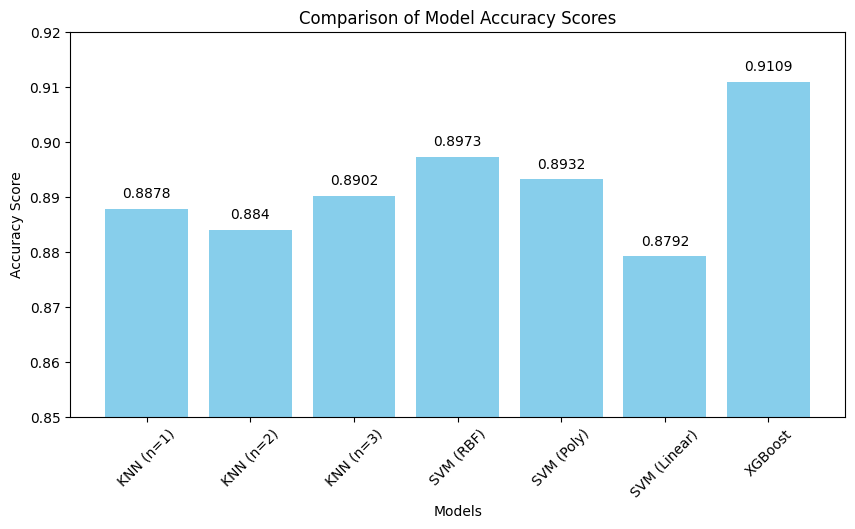

In [44]:
# Models and their scores
models = ["KNN (n=1)", "KNN (n=2)", "KNN (n=3)", 
          "SVM (RBF)", "SVM (Poly)", "SVM (Linear)", "XGBoost"];
scores = [0.8878, 0.8840, 0.8902, 0.8973, 0.8932, 0.8792, 0.9109];

# Create bar plot
plt.figure(figsize=(10,5));
plt.bar(models, scores, color='skyblue');

# Labels and title
plt.xlabel("Models");
plt.ylabel("Accuracy Score");
plt.title("Comparison of Model Accuracy Scores");
plt.ylim(0.85, 0.92);  # Adjusting y-axis for better visualization

# Rotate x labels for better readability
plt.xticks(rotation=45);

# Show values on top of bars
for i, v in enumerate(scores):
    plt.text(i, v + 0.002, str(v), ha='center', fontsize=10);

# Show plot
plt.show();

In [45]:
#From above bar chart we can see XGBoost model provide highest accuracy as
#compared to KNN and SVM.